# SF2935 Project

This is a low-data event, namely we are gven 500 training samples. The dataset comprises of songs, and each row is sample song, which is represented by a an 11-D Vector which account for 11 features - !!!TODO Write them here

In [1]:
import numpy as np 

import matplotlib.pyplot as plt

import scipy.linalg as la

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn


seed = 42

## TODO

- __Pre-processing__
    - [ ] Relevance determination of features
    - [ ] Visualize dataset
    - [ ] Split into training and test sets
    
- __Models__
    - [ ] Logistic regression
    - [ ] Discriminant analysis (LDA, QDA)
    - [ ] k-Nearest neighbours
    - [ ] Support vector machines
    - [ ] Tree based methods 
    - [ ] Neural networks

- __Model validation and tuning__
    - [ ] k-Cross validation
    - [ ] Confusion matrix analysis
    - [ ] Bayesian optimization of hyper-parameters
    - [ ] Relevance determination

- __Extras__
    - [ ] Used GAN to generate data to improve neural network classification

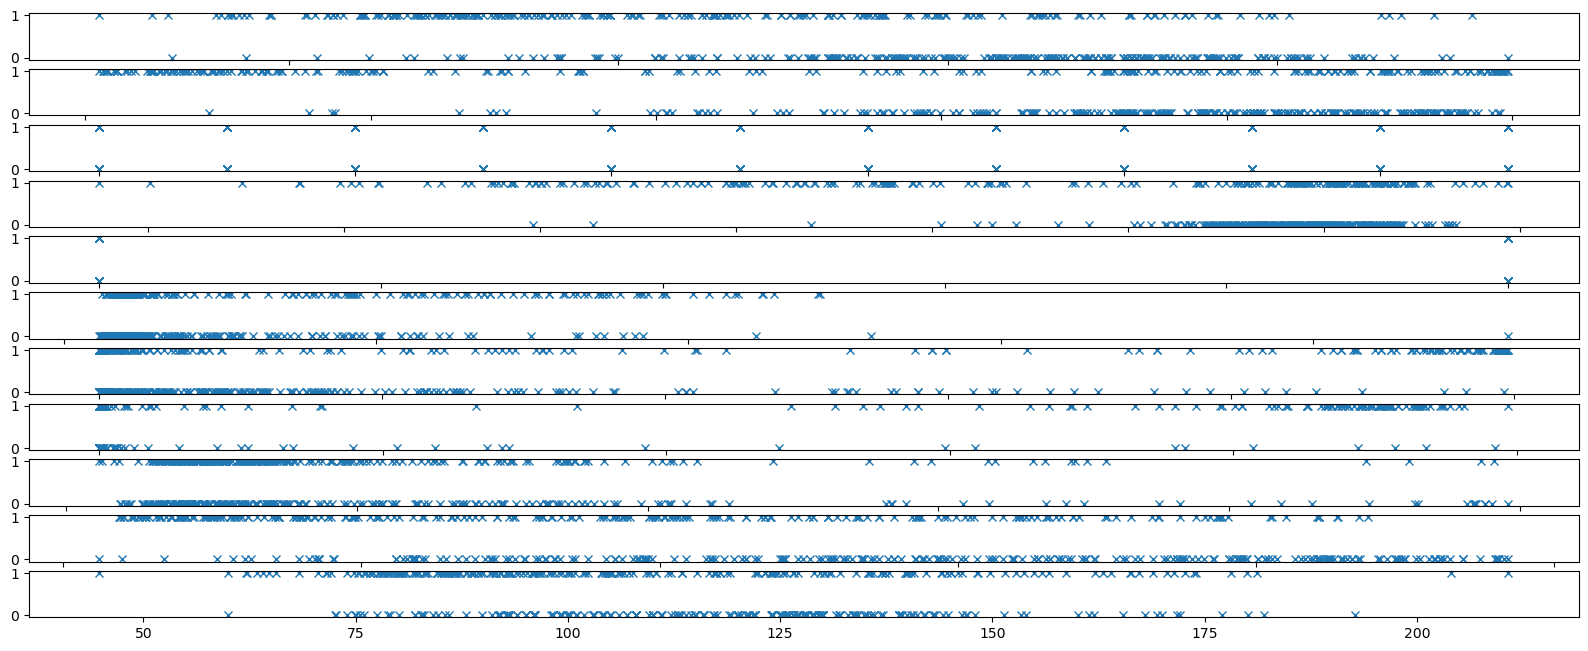

In [63]:
dataset  = np.genfromtxt('project_train.csv', delimiter=',')
dataset  = dataset[~np.isnan(dataset).any(axis=1)]

features = ['danceability', 'energy','key','loudness','mode','speechniess','acousticness','instrumentalness','liveness','valence','tempo']

# x,y of whole dataset
x = dataset[:,0:-1]
y = dataset[:,-1]


loudness_outlier1_ind = np.argmax(x[:,3]) # feature number 4 in list
x = np.delete(x, loudness_outlier1_ind, 0)
y = np.delete(y, loudness_outlier1_ind, 0)

loudness_outlier2_ind = np.argmin(x[:,3]) # feature number 4 in list
x = np.delete(x, loudness_outlier2_ind, 0)
y = np.delete(y, loudness_outlier2_ind, 0)

energy_outlier_ind    = np.argmax(x[:,1]) # feature number 2 in list
x = np.delete(x, energy_outlier_ind, 0)
y = np.delete(y, energy_outlier_ind, 0)



test_set_final = np.genfromtxt('project_test.csv', delimiter=',')
test_set_final  = test_set_final[~np.isnan(test_set_final).any(axis=1)]


fig, axs = plt.subplots(len(features))
for i in range(len(features)):
    axs[i].plot(x[:,i],y,'x')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi']     = 100 

#No. datapoints from each class.
nClass0 = sum(y==0)
nClass1 = sum(y==1)

(360, 9)


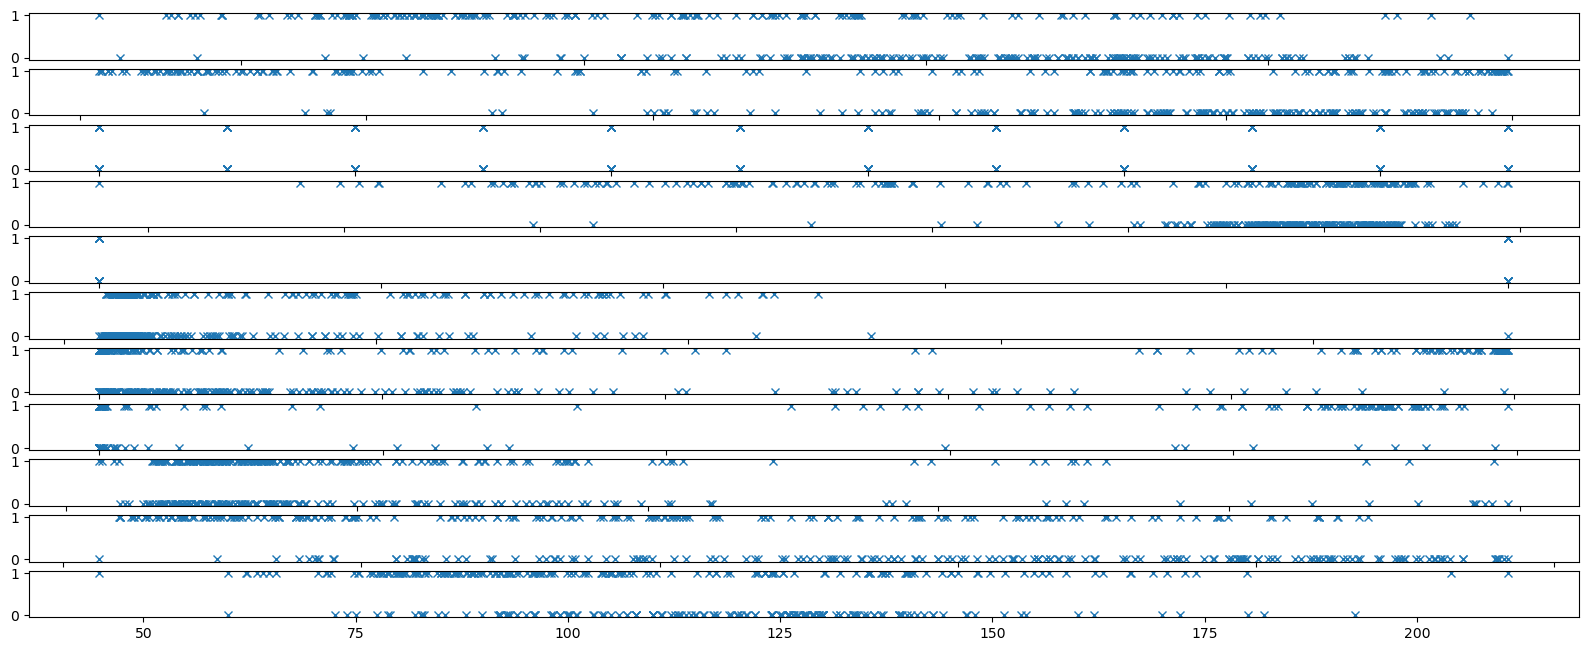

In [83]:
# Scaling the input features, then splitting into training and testing dataset
scaler   = StandardScaler()
scaler.fit(x)
dataset  = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

x_train_cont = np.delete(x_train, (1,3), axis=1)
x_test_cont = np.delete(x_train, (1,3), axis=1)


fig, axs = plt.subplots(len(features))
for i in range(len(features)):
    axs[i].plot(x_train[:,i],y_train,'x')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi']     = 100 


## Logistic regression

In [73]:
# Todo, tuning, regularization, plot coefficients £

logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.725


In [86]:
# Todo, tuning, regularization, plot coefficients £

logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(x_train_cont,y_train)
y_pred=logistic_regression.predict(x_test_cont)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [120, 360]

## Linear Discriminant Analysis (Anton)

In [74]:
#Assumes that the proportion of probabilites is 0.5.

lda = LinearDiscriminantAnalysis() #Creates LDA instance.
lda.fit(x_train,y_train) #Training
lda_predictions = lda.predict(x_test) #The predictions for the test set.
print('Accuracy of LDA is: ',metrics.accuracy_score(y_test,lda_predictions))

Accuracy of LDA is:  0.7583333333333333


## Quadratic Discriminant Analysis (Nazaal)

In [75]:
#Assumes that the proportion of probabilites is 0.5.

qda = QuadraticDiscriminantAnalysis() #Creates QDA instance.
qda.fit(x_train,y_train) #Training.
qda_predictions = qda.predict(x_test) #The predictions for the test set.
print('Accuracy of QDA is: ',metrics.accuracy_score(y_test,qda_predictions))

Accuracy of QDA is:  0.8416666666666667


## k-Nearest neighbours (Viktor)

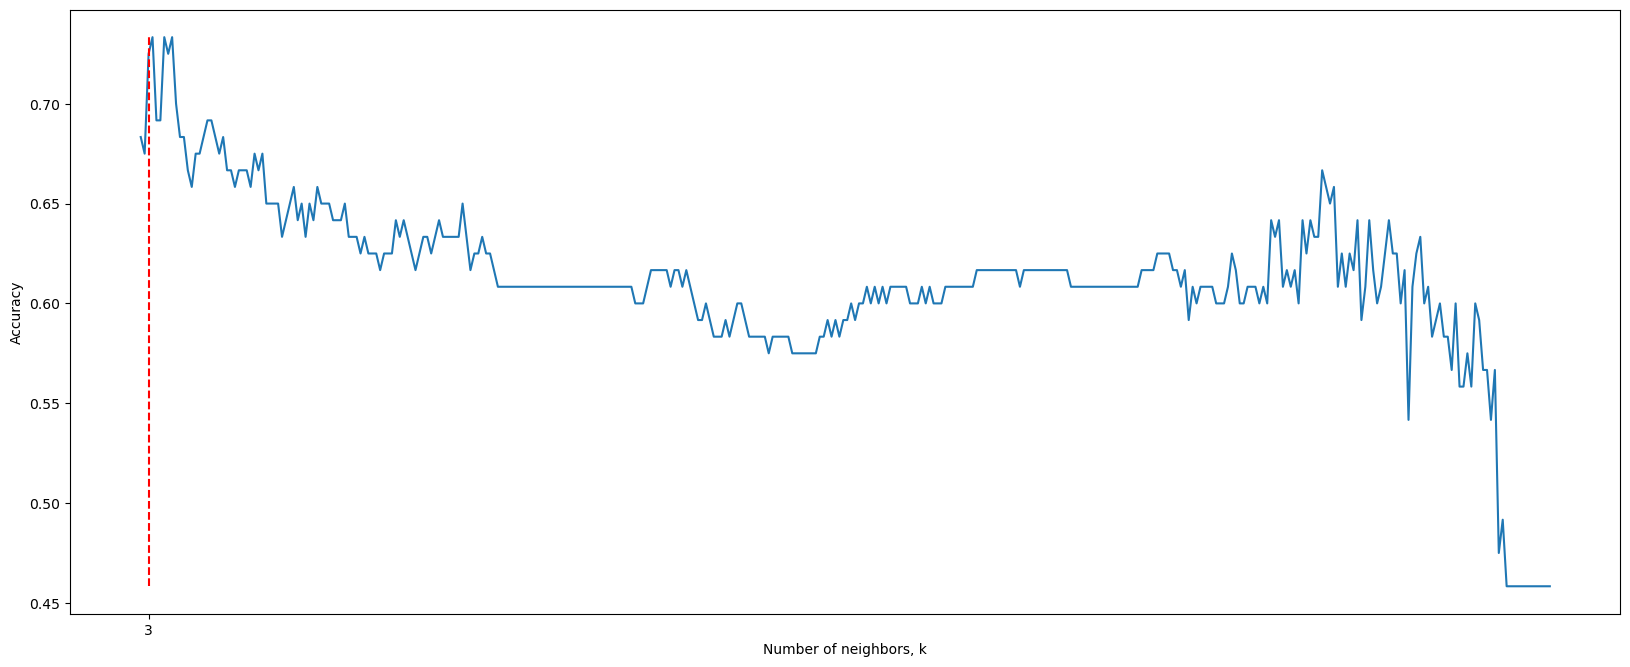

In [76]:
acc_list = []
for k in range(1,len(x_train)+1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
max_acc = max(acc_list)
opt_k = acc_list.index(max_acc)
plt.plot(range(1,len(x_train)+1),acc_list,[opt_k,opt_k],[min(acc_list),max_acc],'r--')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
locs, labels = plt.xticks()
plt.xticks([opt_k])
plt.show()

In [77]:
k = 35
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.65


## Support Vector Machines (Viktor)

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.1, gamma=1.1)
k = 10



#clf = svm.NuSVC(gamma='auto')
clf.fit(x_train,y_train)

scores = cross_val_score(clf, x, y, cv=k)

y_pred = clf.predict(x_test)
print('Accuracy of single test: ',metrics.accuracy_score(y_test, y_pred)) 
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of single test:  0.75
Mean accuracy using  10 -fold CV: 0.73 (+/- 0.26)


## Tree based methods (Anton)

The accuracy is:  0.8


"\n#The Below parameter gives different results for different sample sizes.\n#Parameter testing: Maximum number of regions/leaves allowed.\nacc_list_max_leaf_nodes = []\nm = 5 #Min Max number of regions/leaves allowed.\nn = 30 #Max Max number of regions/leaves allowed.\nfor i in range(m,n):\n    clt.set_params(max_leaf_nodes=i)\n    clt = clt.fit(x_train, y_train)\n    y_pred = clt.predict(x_test)\n    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))\nplt.plot(range(m,n),acc_list_max_leaf_nodes)\n#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))\n#print(argmax(acc_list_max_leaf_nodes))\n#Gets parameters.\n"

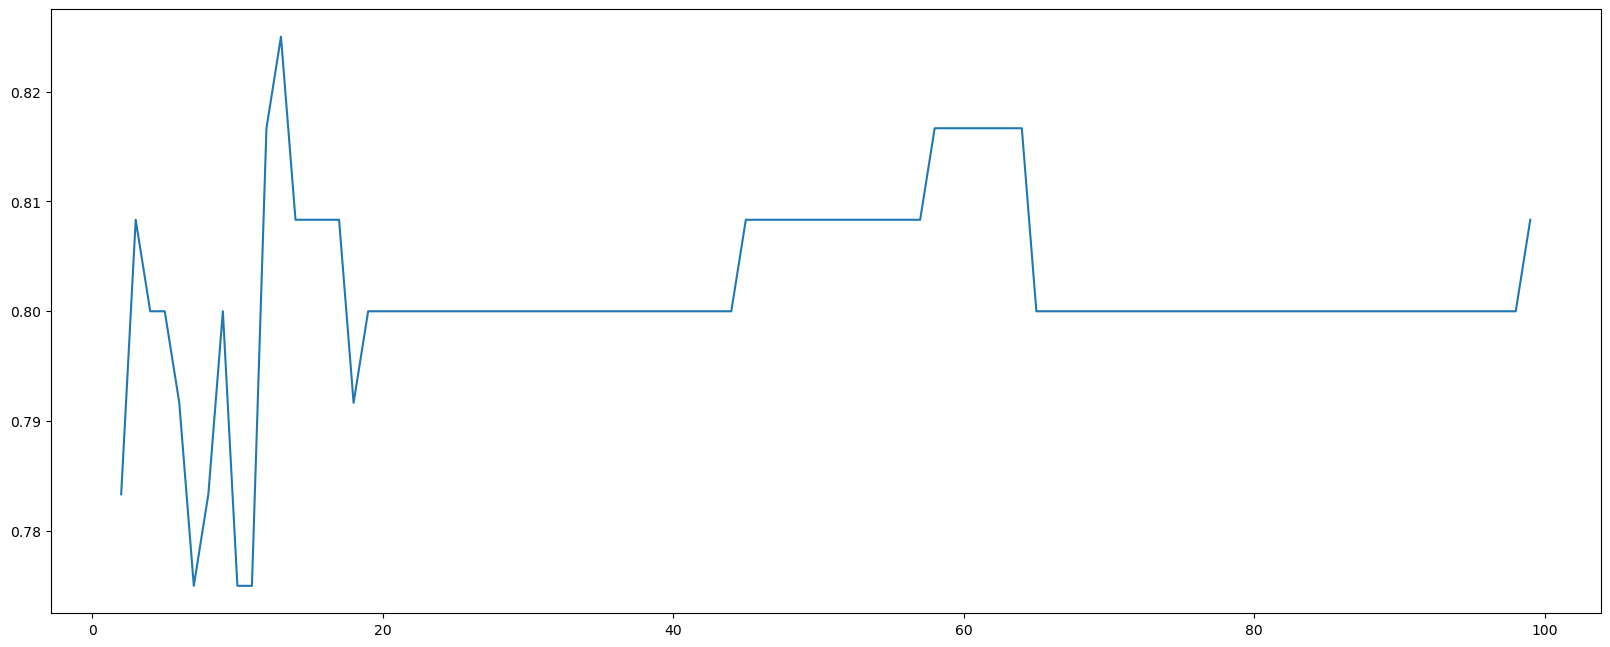

In [79]:

clt = tree.DecisionTreeClassifier()
clt.fit(x_train, y_train)
y_pred = clt.predict(x_test)
print("The accuracy is: ", metrics.accuracy_score(y_test,y_pred))



#The below parameter is "sample size independent".
#Parameter testing: Minimum datapoints required to split a region/node.
acc_list_min_samples_split = []
n = 100 #Minimum sample size needed to split.
for i in range(2,n):
    clt.set_params(min_samples_split=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_min_samples_split.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(2,n),acc_list_min_samples_split)


"""
#The Below parameter gives different results for different sample sizes.
#Parameter testing: Maximum number of regions/leaves allowed.
acc_list_max_leaf_nodes = []
m = 5 #Min Max number of regions/leaves allowed.
n = 30 #Max Max number of regions/leaves allowed.
for i in range(m,n):
    clt.set_params(max_leaf_nodes=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(m,n),acc_list_max_leaf_nodes)
#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
#print(argmax(acc_list_max_leaf_nodes))
#Gets parameters.
"""

#print("The parameters are: ",clt.get_params())
#print("The number of leaves is: ",clt.get_n_leaves())


#Plots the tree.
#tree.plot_tree(clt)

## Neural networks (Nazaal)

In [56]:
# Load train and test input and output into Pytorch dataloaders
training_dataset_loader = torch.utils.data.DataLoader(dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [57]:
# Design atleast 2 architectures
class Net(nn.Module):
    def __init__(self, n_features, layer_architecture, activation_fn):
        super().__init__()
        self.model = nn.Sequential()
        self.model.add_module("Hidden 0", nn.Linear(dim,layer_architecture[0]))
        for i in range(len(layer_architecture)-1):
            self.model.add_module("Hidden"+str(i+1),nn.Linear(dim,layer_architecture[i-1], dim,layer_architecture[i]))
            self.model.add_module("Batch norm "+str(i+1),nn.BatchNorm1d(layer_architecture[i]))
            self.model.add_module("Actvation "+str(i+1),activation_fn)
        self.model.add_module("Output",nn.Linear(layer_architecture[-1],1))
        
    def forward(self,x):
        return self.model(x)


# Look into hyperparameter optimization

In [58]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, X, Y):
        'Initialization'
        self.X = X
        self.Y = Y

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X.shape[0])

    def __getitem__(self, index):
        'Generates one sample of data'
        # Load data and get label
        x = self.X[index,:]
        y = self.Y[index,:]
        return (x, y)

    
trainn = Dataset(x,y)
criterion = nn.MSELoss()
def neural_net_training(neural_net, loss, epochs):
    for i in range(epochs):
        break
        

## Gaussian processes (Nazaal)

In [80]:
var_x = np.std(x, axis=0)
var_y = np.std(y)
kernels = [var_y * RBF(var_x),
           var_y * RationalQuadratic(length_scale=1.0, alpha=0.1),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           var_y * Matern(length_scale=var_x,
                        nu=1.0)]

gp_test_errors = []
for kernel in kernels:
    gpc = GaussianProcessClassifier(kernel=kernel)
    gpc.fit(x_train, y_train)
    gp_test_errors.append(gpc.score(x_test, y_test))
print("Test error are")
gp_test_errors


Test error are


[0.775, 0.7, 0.7916666666666666, 0.8083333333333333]

In [ ]:
# Hyperparameter optimization
def HyperParameterOpt(model):
    # Trains the model over different hyper-parameter settings and finds the best one
    pass

In [ ]:
# Note: Use ensemble methods for final classifier